![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Análisis de sentimientos y técnicas de NLP

En este taller podrán poner en práctica sus conocimientos sobre las diferentes técnicas para el procesamiento de lenguaje natural. El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción sentimientos de viajeros en Twitter

En este taller se usará el conjunto de datos de sentimientos sobre distintas aerolíneas de EE.UU. provenientes de Twitter. Cada observación contiene si el sentimiento de los tweets es positivo, neutral o negativo teniendo en cuenta distintas variables como aerolínea y las razones de los sentimientos negativos (como "retraso en el vuelo" o "servicio grosero"). El objetivo es predecir el sentimiento asociado a cada tweet. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/crowdflower/twitter-airline-sentiment).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score

In [3]:
# Lectura de la información de archivo .zip
tweets = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Tweets.zip', index_col=0)

# Visualización dataset
tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
# Impresión tamaño del cojunto de datos
tweets.shape

(14640, 14)

### Análisis descriptivo

In [5]:
# Cuenta de tweets por cada sentimiento
tweets['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [6]:
# Cuenta de tweets por cada aerolínea
tweets['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

<AxesSubplot:title={'center':'Sentiminetos por aerolínea'}, xlabel='airline'>

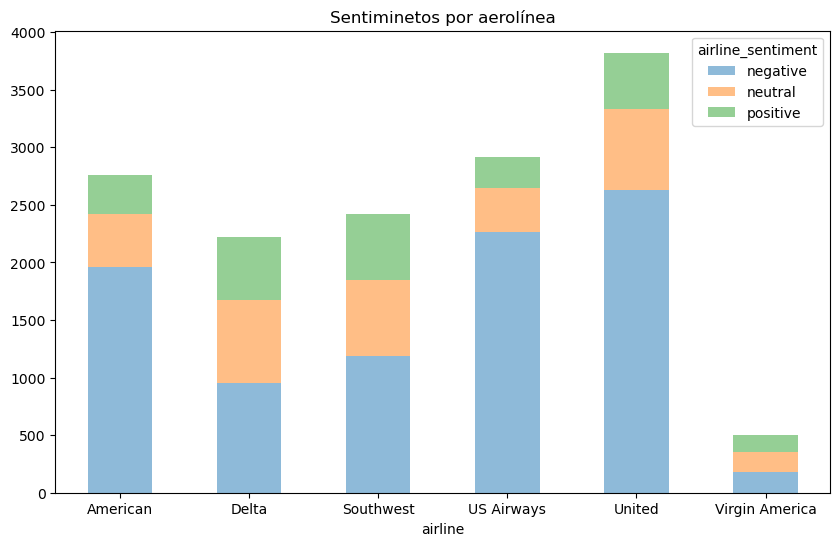

In [7]:
# Plot con cuenta de tweets por cada aerolínea y sentimiento
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiminetos por aerolínea")

### Liberias y Variables de interés y predicción

In [8]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

In [9]:
# Separación de variables predictoras (X) y de variable de interés (y)
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [10]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 1 - Uso de CountVectorizer

En la celda 1 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [20]:
# Creación del vectorizador CountVectorizer
vectorizer = CountVectorizer(lowercase=False)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Creación del modelo de Random Forest y ajuste con los datos de entrenamiento
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_vec, y_train)

# Evaluación del modelo con el conjunto de test y la métrica del accuracy
accuracy1 = rf.score(X_test_vec, y_test)
print("Accuracy:", accuracy1)


Accuracy: 0.7628311258278145


El accuracy del modelo Random Forest con la función CountVectorizer es de 0.762, presentando un desempeño aceptable en la tarea de predecir correctamente el sentimiento de los tweets. Para este y los demás modelos, se ajusta el parámetro lowercase como False para identificar el sentimiento de los tweets escritos en mayúscula pues estos pueden contener un mensaje con cierta connotación específica y puedan ser capturados por el modelo.

### Punto 2 - Eliminación de Stopwords

En la celda 2 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **eliminen stopwords** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [21]:
# Creación del vectorizador CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english', lowercase=False)

# Transformación del texto a características numéricas para el conjunto de entrenamiento y prueba
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Creación del modelo de Random Forest y ajuste con los datos de entrenamiento
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_vec, y_train)

# Evaluación del modelo con el conjunto de test y la métrica del accuracy
accuracy2 = rf.score(X_test_vec, y_test)
print("Accuracy:", accuracy2)


Accuracy: 0.7628311258278145


El accuracy del modelo Random Forest con la función CountVectorizer y eliminando stopwords, es de 0.762, presentando un desempeño aceptable en la tarea de predecir correctamente el sentimiento de los tweets.

### Punto 3 - Lematización con verbos

En la celda 3 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('omw-1.4')

# Lematizar solo los verbos
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
def lemmatize_verbs(text):
    words = nltk.word_tokenize(text)
    return ' '.join([lemmatizer.lemmatize(word, pos='v') for word in words])

# Crear el objeto CountVectorizer con la función de lematización
vectorizer = CountVectorizer(preprocessor=lemmatize_verbs, lowercase=False)

# Transformar los datos de entrenamiento y test
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Crear el modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Ajustar el modelo a los datos de entrenamiento
rf_model.fit(X_train, y_train)

# Predecir el sentimiento de los tweets en el set de test
y_pred = rf_model.predict(X_test)

# Evaluar el desempeño del modelo en el set de test
from sklearn.metrics import accuracy_score
accuracy3 = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy3)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Daniel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Daniel\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Daniel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Accuracy: 0.7649006622516556


El desempeño en términos de accuracy del modelo Random Forest con la función CountVectorizer en el cuál se lematizan los verbos, es de 0.765 aproximadamente, presentando un mejor desempeño respecto a los dos anteriores en la tarea de predecir el sentimiento de los tweets usando los sets de entrenamiento y test definidos anteriormente.

### Punto 4 - Multiples técnicas

En la celda 4 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer, eliminen stopwords, lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [23]:
import nltk
nltk.download('averaged_perceptron_tagger')
# Separación de variables predictoras (X) y de variable de interés (y)
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Preprocesamiento de los datos
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def preprocess(text):
    # Tokenización y eliminación de stopwords
    words = [word.lower() for word in text.split() if word.lower() not in stop_words]
    # Lematización solo de verbos
    tagged = pos_tag(words)
    words = [lemmatizer.lemmatize(word, pos='v') if tag.startswith('V') else word for word, tag in tagged]
    return ' '.join(words)

vectorizer = CountVectorizer(preprocessor=preprocess, lowercase=False)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Entrenamiento del modelo
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_vect, y_train)

# Predicción de los valores para el set de prueba
y_pred = rf.predict(X_test_vect)

# Calcular el accuracy del modelo
from sklearn.metrics import accuracy_score
accuracy4 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy4)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Daniel\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Accuracy: 0.769453642384106


El desempeño del modelo de Random Forest con CountVecrorizer en el cual se lematizan verbos y se eliminan stopwords, es de 0.769, mejor que los tres anteriores. Este modelo tiene un mejor desempeño en la tarea de predecir los sentimientos de los tweets, al mezclarse técnicas de procesamiento de texto.

### Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos (random forest) y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

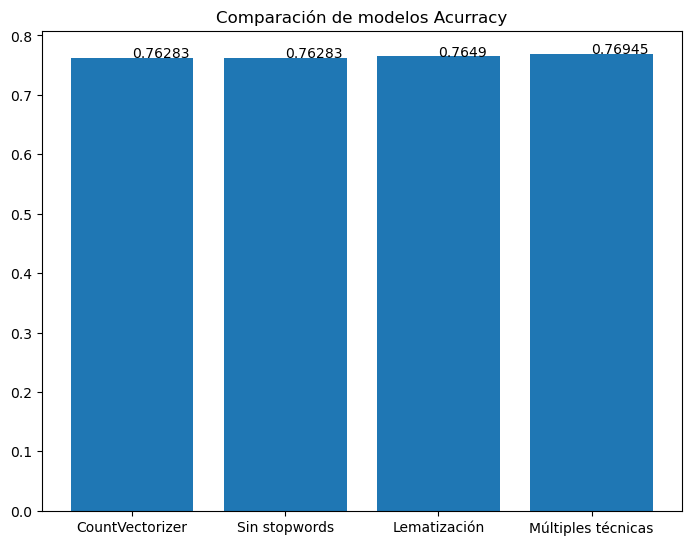

In [25]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos Acurracy")
ejeX = ['CountVectorizer', 'Sin stopwords', 'Lematización','Múltiples técnicas']
ejeY = np.round([accuracy1, accuracy2, accuracy3, accuracy4],5)
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

El modelo con múltiples técnicas es el que posee mejor accuracy en la tarea de predecir el sentimiento de los tweets definidos por el conjunto de datos en cuestión. 

Ventajas: 

El mejor modelo permite reducir la cantidad de palabras y aumentar la relevancia de las mismas, lo que puede mejorar la precisión de la predicción. Además, el proceso de eliminación de lematización puede reducir la complejidad del modelo y mejorar la eficiencia computacional.


Desventajas:

El peor modelo al no reducir el vocabulario y considerar todas las palabras, puede llevar a sobreajuste y a utilizar palabras irrelevantes para la predicción, además de ser computacionalmente costoso en términos de memoria y tiempo de procesamiento.